In [2]:
# Downloading the Dataset Stored in Google Drive
!gdown --id 17LoZfbDHog3A_GlTkzg_NoXWCY1sKEke
!gdown --id 1lOTAe_YV-NOVmIWPVvZghrXUTc8aDVYf
!gdown --id 1eddyMi_1K5jIwwprDsuLxUDDPTDjEL0q # Kaggle API Key

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17LoZfbDHog3A_GlTkzg_NoXWCY1sKEke
To: /content/Avito_train.zip
100% 333M/333M [00:02<00:00, 116MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lOTAe_YV-NOVmIWPVvZghrXUTc8aDVYf
To: /content/Avito_test.zip
100% 116M/116M [00:00<00:00, 167MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: h

In [3]:
!unzip Avito_train.zip
!unzip Avito_test.zip

Archive:  Avito_train.zip
  inflating: train.csv               
Archive:  Avito_test.zip
  inflating: test.csv                


In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from string import punctuation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import argparse

In [ ]:
# Loading Train and Test Data
tr_df=pd.read_csv("train.csv")
te_df=pd.read_csv("test.csv")

In [ ]:
tr_df.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [ ]:
ytr=tr_df['deal_probability'].values.astype(np.float32)

In [ ]:
tr_df.shape

(1503424, 18)

In [ ]:
tr_df.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  61576
param_2                 654542
param_3                 862565
title                        0
description             116276
price                    85362
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1             112588
deal_probability             0
dtype: int64

### Imputing Missing Values

In [ ]:
tr_df['price'] = tr_df['price'].fillna(tr_df.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean())))
te_df['price'] = te_df['price'].fillna(te_df.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean())))

tr_df['image_top_1'] = tr_df['image_top_1'].fillna(-1)
te_df['image_top_1'] = te_df['image_top_1'].fillna(-1)

tr_df['description']=tr_df['description'].fillna('nil')
te_df['description']=te_df['description'].fillna('nil')

tr_df['title']=tr_df['title'].fillna('nil')
te_df['title']=te_df['title'].fillna('nil')

In [ ]:
tr_df['param_1']=tr_df['param_1'].fillna('nil')
te_df['param_1']=te_df['param_1'].fillna('nil')

tr_df['param_2']=tr_df['param_2'].fillna('nil')
te_df['param_2']=te_df['param_2'].fillna('nil')

tr_df['param_3']=tr_df['param_3'].fillna('nil')
te_df['param_3']=te_df['param_3'].fillna('nil')

In [ ]:
tr_df.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                      0
param_2                      0
param_3                      0
title                        0
description                  0
price                        0
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1                  0
deal_probability             0
dtype: int64

In [ ]:
tr_df=tr_df.astype({'image_top_1':int,'item_seq_number':int})
te_df=te_df.astype({'image_top_1':int,'item_seq_number':int})

### Performing Feature Engineering

In [ ]:
tr_df['activation_date'] = pd.to_datetime(tr_df['activation_date'], errors = 'coerce')
te_df['activation_date'] = pd.to_datetime(te_df['activation_date'], errors = 'coerce')

In [ ]:
# feature engineering
tr_df['price']=np.log(tr_df['price']+0.001)
te_df['price']=np.log(te_df['price']+0.001)

# extracting some extra features from activation date feature
# extracting day from the date
tr_df['day'] = tr_df['activation_date'].dt.day
te_df['day'] = te_df['activation_date'].dt.day

tr_df['dayofweek_name'] = tr_df['activation_date'].dt.day_name
tr_df['is_weekend'] = np.where(tr_df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)

te_df['dayofweek_name'] = te_df['activation_date'].dt.day_name
te_df['is_weekend'] = np.where(te_df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)

# extracting weekday from the date
tr_df['weekday'] = tr_df['activation_date'].dt.weekday
te_df['weekday'] = te_df['activation_date'].dt.weekday

# length of description
tr_df['description_len'] = tr_df['description'].apply(lambda x : len(x.split()))
te_df['description_len'] = te_df['description'].apply(lambda x : len(x.split()))

# length of title
tr_df['title_len'] = tr_df['title'].apply(lambda x : len(x.split()))
te_df['title_len'] = te_df['title'].apply(lambda x : len(x.split()))

# param_combined and its length
tr_df['param_combined'] = tr_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
tr_df['param_combined'] = tr_df['param_combined'].fillna("nil")
tr_df['param_combined_len'] = tr_df['param_combined'].apply(lambda x : len(x.split()))

te_df['param_combined'] = te_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
te_df['param_combined'] = te_df['param_combined'].fillna("nil")
te_df['param_combined_len'] = te_df['param_combined'].apply(lambda x : len(x.split()))
                                                            
# character len of text columns
tr_df['description_char'] = tr_df['description'].apply(len)
tr_df['title_char'] = tr_df['title'].apply(len)
tr_df['param_char'] = tr_df['param_combined'].apply(len)

te_df['description_char'] = te_df['description'].apply(len)
te_df['title_char'] = te_df['title'].apply(len)
te_df['param_char'] = te_df['param_combined'].apply(len)

tr_df['punctuation_count'] = tr_df['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
te_df['punctuation_count'] = te_df['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [ ]:
tr_df.shape

(1503424, 30)

### LabelEncoding Categorical Features

In [ ]:
# Label encode the categorical variables 


from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
lbl.fit(list(tr_df['region'].values.reshape(-1,1)) + list(te_df['region'].values.reshape(-1,1)))
tr_df['region_enc']=lbl.transform(tr_df['region'].values.reshape(-1,1))
te_df['region_enc']=lbl.transform(te_df['region'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lbl.fit(list(tr_df['city'].values.reshape(-1,1)) + list(te_df['city'].values.reshape(-1,1)))
tr_df['city_enc']=lbl.transform(tr_df['city'].values.reshape(-1,1))
te_df['city_enc']=lbl.transform(te_df['city'].values.reshape(-1,1))

In [ ]:
lbl.fit(list(tr_df['parent_category_name'].values.reshape(-1,1)) + list(te_df['parent_category_name'].values.reshape(-1,1)))
tr_df['pcn_enc']=lbl.transform(tr_df['parent_category_name'].values.reshape(-1,1))
te_df['pcn_enc']=lbl.transform(te_df['parent_category_name'].values.reshape(-1,1))

In [ ]:
lbl.fit(list(tr_df['category_name'].values.reshape(-1,1)) + list(te_df['category_name'].values.reshape(-1,1)))
tr_df['cn_enc']=lbl.transform(tr_df['category_name'].values.reshape(-1,1))
te_df['cn_enc']=lbl.transform(te_df['category_name'].values.reshape(-1,1))

In [ ]:
lbl.fit(tr_df['user_type'].values.reshape(-1,1))
tr_df['ut_enc']=lbl.transform(tr_df['user_type'].values.reshape(-1,1))
te_df['ut_enc']=lbl.transform(te_df['user_type'].values.reshape(-1,1))

In [ ]:
lbl.fit(list(tr_df['param_1'].values.reshape(-1,1)) + list(te_df['param_1'].values.reshape(-1,1)))
tr_df['p1_enc']=lbl.transform(tr_df['param_1'].values.reshape(-1,1))
te_df['p1_enc']=lbl.transform(te_df['param_1'].values.reshape(-1,1))

In [ ]:
lbl.fit(list(tr_df['param_2'].values.reshape(-1,1)) + list(te_df['param_2'].values.reshape(-1,1)))
tr_df['p2_enc']=lbl.transform(tr_df['param_2'].values.reshape(-1,1))
te_df['p2_enc']=lbl.transform(te_df['param_2'].values.reshape(-1,1))

In [ ]:
lbl.fit(list(tr_df['param_3'].values.reshape(-1,1)) + list(te_df['param_3'].values.reshape(-1,1)))
tr_df['p3_enc']=lbl.transform(tr_df['param_3'].values.reshape(-1,1))
te_df['p3_enc']=lbl.transform(te_df['param_3'].values.reshape(-1,1))

In [ ]:
tr_df.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'day',
       'dayofweek_name', 'is_weekend', 'weekday', 'description_len',
       'title_len', 'param_combined', 'param_combined_len', 'description_char',
       'title_char', 'param_char', 'punctuation_count', 'region_enc',
       'city_enc', 'pcn_enc', 'cn_enc', 'ut_enc', 'p1_enc', 'p2_enc',
       'p3_enc'],
      dtype='object')

In [ ]:
tr_df=tr_df.astype({'image_top_1':int,'item_seq_number':int})
te_df=te_df.astype({'image_top_1':int,'item_seq_number':int})

### Dropping Out Useless Columns

In [ ]:
cols_to_drop = ['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'activation_date',
       'user_type', 'image','dayofweek_name','param_combined']
tr_df.drop(cols_to_drop + ["deal_probability"], axis=1, inplace=True)
x_train = tr_df
te_df.drop(cols_to_drop, axis=1, inplace=True)
x_test = te_df

### Building a Simple ANN(No Image Features are Included)

In [ ]:
from sklearn.model_selection import train_test_split

xtr,xcv,ytr,ycv = train_test_split(x_train, ytr, test_size = 0.03, random_state = 42, shuffle=False)

# checking the shape of the newly obtained datasets
print("Shape of x_train :", xtr.shape)
print("Shape of y_train :", ytr.shape)
print("Shape of x_valid :", xcv.shape)
print("Shape of y_valid :", ycv.shape)

Shape of x_train : (1458321, 21)
Shape of y_train : (1458321,)
Shape of x_valid : (45103, 21)
Shape of y_valid : (45103,)


In [ ]:
cat_feat=['day', 'is_weekend', 'weekday','region_enc','item_seq_number', 'image_top_1', 'city_enc', 'pcn_enc', 'cn_enc',
       'ut_enc', 'p1_enc', 'p2_enc', 'p3_enc']
num_feat=['price','description_len', 'title_len',
       'param_combined_len', 'description_char', 'title_char', 'param_char',
       'punctuation_count']

### Applying Min Max Scaler To Numerical Features

In [ ]:
for col in num_feat:
    scaler = MinMaxScaler()
    xtr[col] = scaler.fit_transform(xtr[col].values.reshape(-1,1))
    xcv[col] = scaler.transform(xcv[col].values.reshape(-1,1))

In [ ]:
xtr.head(5)

,price,item_seq_number,image_top_1,day,is_weekend,weekday,description_len,title_len,param_combined_len,description_char,...,param_char,punctuation_count,region_enc,city_enc,pcn_enc,cn_enc,ut_enc,p1_enc,p2_enc,p3_enc
0,0.403015,2,1008,28,0,1,0.008451,0.10,0.166667,0.017751,...,0.418182,0.001414,19,462,4,42,1,249,112,1217
1,0.465967,19,692,26,0,6,0.008451,0.10,0.000000,0.012457,...,0.072727,0.002122,17,1314,2,22,1,122,112,1217
2,0.474956,9,3032,20,0,0,0.022535,0.05,0.666667,0.030520,...,0.454545,0.003536,16,1290,0,2,1,84,112,1217
3,0.456277,286,796,25,0,5,0.002817,0.00,0.166667,0.006540,...,0.327273,0.000707,21,950,4,42,0,38,112,1217
4,0.546896,3,2264,16,0,3,0.004225,0.10,0.333333,0.007163,...,0.290909,0.000707,4,318,6,0,1,278,124,46


In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as kb
from tensorflow.keras import layers, Input, callbacks, losses,optimizers
from datetime import datetime
I1= Input(shape=(len(cat_feat),),name='I1')

I2= Input(shape=(len(num_feat),),name='I2')
    
concat1=layers.concatenate([I1,I2])

BN=layers.BatchNormalization()(concat1)

D=layers.Dense(128,activation='relu',kernel_initializer='he_uniform')(BN)

D=layers.Dropout(0.4)(D)
    
D=layers.Dense(64,activation='relu',kernel_initializer='he_uniform')(D)

pred=layers.Dense(1,activation='linear')(D)

model=keras.Model(inputs=[I1,I2],outputs=pred)
    
def rmse(y_true,y_pred):
  return kb.sqrt(kb.mean(kb.square(y_pred-y_true)))

model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
               loss='mse',
               metrics=rmse)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, TensorBoard
checkpoint = ModelCheckpoint(filepath='Base Neural Network.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                           patience=40, 
                           restore_best_weights=True,
                           mode='min')
#reduce Learning Rate
reduceLR = ReduceLROnPlateau(monitor='val_rmse', min_lr=0.0000001,patience=5, factor=0.9)

#terminate on NaN
terminate = TerminateOnNaN()

tensorboard = TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [ ]:
history=model.fit([xtr[cat_feat],
            xtr[num_feat]],
           ytr,
            batch_size=4096,
           epochs=200,
          callbacks=[checkpoint, early_stop, reduceLR, terminate, tensorboard],
          validation_data=([xcv[cat_feat],
                            xcv[num_feat]],ycv))

Epoch 1/200
355/357 [============================>.] - ETA: 0s - loss: 0.1497 - rmse: 0.3130
Epoch 1: val_loss improved from inf to 0.06370, saving model to Base Neural Network.hdf5
357/357 [==============================] - 8s 22ms/step - loss: 0.1495 - rmse: 0.3126 - val_loss: 0.0637 - val_rmse: 0.2489 - lr: 0.0100
Epoch 2/200
356/357 [============================>.] - ETA: 0s - loss: 0.0631 - rmse: 0.2512
Epoch 2: val_loss improved from 0.06370 to 0.06136, saving model to Base Neural Network.hdf5
357/357 [==============================] - 8s 21ms/step - loss: 0.0631 - rmse: 0.2512 - val_loss: 0.0614 - val_rmse: 0.2445 - lr: 0.0100
Epoch 3/200
356/357 [============================>.] - ETA: 0s - loss: 0.0612 - rmse: 0.2474
Epoch 3: val_loss improved from 0.06136 to 0.06032, saving model to Base Neural Network.hdf5
357/357 [==============================] - 8s 21ms/step - loss: 0.0612 - rmse: 0.2473 - val_loss: 0.0603 - val_rmse: 0.2426 - lr: 0.0100
Epoch 4/200
355/357 [==============

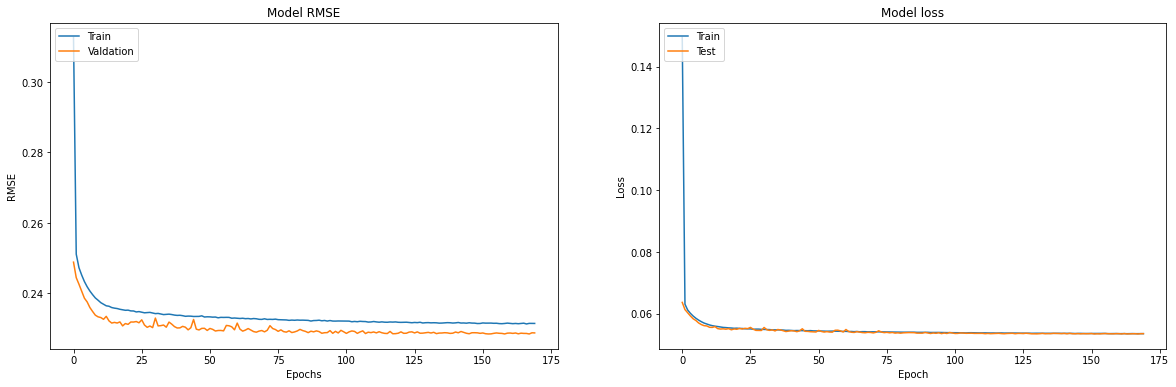

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valdation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

### ANN(Using Extracted Image Features).

In [5]:
import pandas as pd 
!gdown --id 1Bata5gKCaHXsxa3a4ez8hQKN7Bo5tJ2G
tr_img_feat=pd.read_csv("Image Features.csv")
#te_img_feat=pd.read_csv("Test Image Features.csv")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Bata5gKCaHXsxa3a4ez8hQKN7Bo5tJ2G
To: /content/Image Features.csv
100% 221M/221M [00:02<00:00, 95.2MB/s]


In [6]:
tr_df=pd.read_csv("train.csv")
te_df=pd.read_csv("test.csv")

### Imputing Missing Values

In [7]:
# Replacing JPG with a Blank String to Merge with train dataset
tr_img_feat['image'] = tr_img_feat['image'].str.replace('.jpg', '')
#te_img_feat['image'] = te_img_feat['image'].str.replace('.jpg', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
tr_img_feat['image'].values[0]

'4daefa97ba5941c12258a1426914a04ceb264aab8ca1eb78237838f62b37b987'

In [9]:
tr_df=tr_df.astype({'image_top_1':object})
te_df=te_df.astype({'image_top_1':object})

In [10]:
tr_df['image'] = tr_df['image'].fillna('No Images for this ad')
te_df['image'] = te_df['image'].fillna('No Images for this ad')

tr_df['price'] = tr_df['price'].fillna(tr_df.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean())))
te_df['price'] = te_df['price'].fillna(tr_df.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean())))

tr_df['image_top_1'] = tr_df['image_top_1'].fillna(-1)
te_df['image_top_1'] = te_df['image_top_1'].fillna(-1)

tr_df['description']=tr_df['description'].fillna('nil')
te_df['description']=te_df['description'].fillna('nil')

tr_df['title']=tr_df['title'].fillna('nil')
te_df['title']=te_df['title'].fillna('nil')

tr_df['param_1']=tr_df['param_1'].fillna('nil')
te_df['param_1']=te_df['param_1'].fillna('nil')

tr_df['param_2']=tr_df['param_2'].fillna('nil')
te_df['param_2']=te_df['param_2'].fillna('nil')

tr_df['param_3']=tr_df['param_3'].fillna('nil')
te_df['param_3']=te_df['param_3'].fillna('nil')

In [11]:
tr_df=tr_df.astype({'image_top_1':int,"item_seq_number":int}) # Making this an ordinal feature
te_df=te_df.astype({'image_top_1':int,"item_seq_number":int}) # Making this an ordinal feature

In [12]:
tr_df['image'].value_counts()

No Images for this ad                                               112588
d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19         1
cdb07c78e29b55d8fd461564108270fc393f1a58f23d1ffb96ced2729677feb9         1
e37590d9707aa68c744c2dfdfcb1846373851e3b31f419d467df4276f4aebad3         1
d338de51dd54a486769cd5990f9b6f189cb573882f09fc49d8d28b9eda21283d         1
                                                                     ...  
4ab41579299612e3f31c1232f922e8649e80aa4b19fb9e024b0115b6d54da7f5         1
c954dcb27e0fcccf6444ff46d010aa5f54fce0879d7b9af89a63482be66a6c6f         1
24f1d8366b94021c9e2a107aba91fb9f56f407565f56c31450a8bf42649847d6         1
b4a9266bbeb91fa4cac0aaab389eb5a514003ce89fcf2c513d7b966d98774386         1
87cca5889b96b0368bffbe7cdb3f0cc5fa660f33be9fd027d0fc95dc15cdcb3e         1
Name: image, Length: 1390837, dtype: int64

In [13]:
tr_df.dtypes

item_id                  object
user_id                  object
region                   object
city                     object
parent_category_name     object
category_name            object
param_1                  object
param_2                  object
param_3                  object
title                    object
description              object
price                   float64
item_seq_number           int64
activation_date          object
user_type                object
image                    object
image_top_1               int64
deal_probability        float64
dtype: object

In [14]:
tr=pd.merge(tr_df,tr_img_feat,on="image",how='left')
#te=pd.merge(te_df,te_img_feat,on="image",how='left')

In [15]:
tr.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                      0
param_2                      0
param_3                      0
title                        0
description                  0
price                        0
item_seq_number              0
activation_date              0
user_type                    0
image                        0
image_top_1                  0
deal_probability             0
width                   112592
height                  112592
average_red             112592
average_green           112592
average_blue            112592
image_size              112592
img_blur                112592
dtype: int64

In [16]:
# Imputing all the values as -1 for missing image features
tr['width'] = tr['width'].fillna(-1)
tr['height'] = tr['height'].fillna(-1)
tr['average_red'] = tr['average_red'].fillna(-1)
tr['average_blue'] = tr['average_blue'].fillna(-1)
tr['average_green'] = tr['average_green'].fillna(-1)
tr['image_size'] = tr['image_size'].fillna(-1)
tr['img_blur'] = tr['img_blur'].fillna(-1)

'''
te['width'] = te['width'].fillna(-1)
te['height'] = te['height'].fillna(-1)
te['average_red'] = te['average_red'].fillna(-1)
te['average_blue'] = te['average_blue'].fillna(-1)
te['average_green'] = te['average_green'].fillna(-1)
te['image_size'] = te['image_size'].fillna(-1)
te['img_blur'] = te['img_blur'].fillna(-1)
'''

"\nte['width'] = te['width'].fillna(-1)\nte['height'] = te['height'].fillna(-1)\nte['average_red'] = te['average_red'].fillna(-1)\nte['average_blue'] = te['average_blue'].fillna(-1)\nte['average_green'] = te['average_green'].fillna(-1)\nte['image_size'] = te['image_size'].fillna(-1)\nte['img_blur'] = te['img_blur'].fillna(-1)\n"

In [17]:
tr.isna().sum()

item_id                 0
user_id                 0
region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
title                   0
description             0
price                   0
item_seq_number         0
activation_date         0
user_type               0
image                   0
image_top_1             0
deal_probability        0
width                   0
height                  0
average_red             0
average_green           0
average_blue            0
image_size              0
img_blur                0
dtype: int64

In [18]:
tr['activation_date'] = pd.to_datetime(tr['activation_date'], errors = 'coerce')

In [19]:
import numpy as np
from string import punctuation
# feature engineering
# extracting some extra features from activation date feature

tr['price']=np.log(tr['price']+0.001)

# extracting day from the date
tr['day'] = tr['activation_date'].dt.day


tr['dayofweek_name'] = tr['activation_date'].dt.day_name
tr['is_weekend'] = np.where(tr['dayofweek_name'].isin(['Sunday','Saturday']),1,0)


# extracting weekday from the date
tr['weekday'] = tr['activation_date'].dt.weekday

# length of description
tr['description_len'] = tr['description'].apply(lambda x : len(x.split()))


# length of title
tr['title_len'] = tr['title'].apply(lambda x : len(x.split()))


# param_combined and its length
tr['param_combined'] = tr.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
tr['param_combined'] = tr['param_combined'].fillna("nil")
tr['param_combined_len'] = tr['param_combined'].apply(lambda x : len(x.split()))


                                                            
# character len of text columns
tr['description_char'] = tr['description'].apply(len)
tr['title_char'] = tr['title'].apply(len)
tr['param_char'] = tr['param_combined'].apply(len)



# Occurences of punctuation Marks
tr['punctuation_count'] = tr['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 


### LabelEncoding Categorical Features

In [20]:
# Label encode the categorical variables 


from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
lbl.fit(list(tr['region'].values.reshape(-1,1)) + list(te_df['region'].values.reshape(-1,1)))
tr['region_enc']=lbl.transform(tr['region'].values.reshape(-1,1))
te_df['region_enc']=lbl.transform(te_df['region'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
lbl.fit(list(tr_df['city'].values.reshape(-1,1)) + list(te_df['city'].values.reshape(-1,1)))
tr['city_enc']=lbl.transform(tr['city'].values.reshape(-1,1))
te_df['city_enc']=lbl.transform(te_df['city'].values.reshape(-1,1))

In [22]:
lbl.fit(list(tr['parent_category_name'].values.reshape(-1,1)) + list(te_df['parent_category_name'].values.reshape(-1,1)))
tr['pcn_enc']=lbl.transform(tr['parent_category_name'].values.reshape(-1,1))
te_df['pcn_enc']=lbl.transform(te_df['parent_category_name'].values.reshape(-1,1))

In [23]:
lbl.fit(list(tr['category_name'].values.reshape(-1,1)) + list(te_df['category_name'].values.reshape(-1,1)))
tr['cn_enc']=lbl.transform(tr['category_name'].values.reshape(-1,1))
te_df['cn_enc']=lbl.transform(te_df['category_name'].values.reshape(-1,1))

In [24]:
lbl.fit(tr['user_type'].values.reshape(-1,1))
tr['ut_enc']=lbl.transform(tr['user_type'].values.reshape(-1,1))
te_df['ut_enc']=lbl.transform(te_df['user_type'].values.reshape(-1,1))

In [25]:
lbl.fit(list(tr['param_1'].values.reshape(-1,1)) + list(te_df['param_1'].values.reshape(-1,1)))
tr['p1_enc']=lbl.transform(tr['param_1'].values.reshape(-1,1))
te_df['p1_enc']=lbl.transform(te_df['param_1'].values.reshape(-1,1))

In [26]:
lbl.fit(list(tr['param_2'].values.reshape(-1,1)) + list(te_df['param_2'].values.reshape(-1,1)))
tr['p2_enc']=lbl.transform(tr['param_2'].values.reshape(-1,1))
te_df['p2_enc']=lbl.transform(te_df['param_2'].values.reshape(-1,1))

In [27]:
lbl.fit(list(tr['param_3'].values.reshape(-1,1)) + list(te_df['param_3'].values.reshape(-1,1)))
tr['p3_enc']=lbl.transform(tr['param_3'].values.reshape(-1,1))
te_df['p3_enc']=lbl.transform(te_df['param_3'].values.reshape(-1,1))

In [28]:
tr.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'width',
       'height', 'average_red', 'average_green', 'average_blue', 'image_size',
       'img_blur', 'day', 'dayofweek_name', 'is_weekend', 'weekday',
       'description_len', 'title_len', 'param_combined', 'param_combined_len',
       'description_char', 'title_char', 'param_char', 'punctuation_count',
       'region_enc', 'city_enc', 'pcn_enc', 'cn_enc', 'ut_enc', 'p1_enc',
       'p2_enc', 'p3_enc'],
      dtype='object')

In [34]:
tr_gru=tr.copy() # For GRU Embedding
tr_lstm=tr.copy() # For LSTM Embedding

### Dropping Out Useless Columns

In [ ]:
ytr=tr['deal_probability'].values.astype(np.float32)

In [ ]:
cols_to_drop = ['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'activation_date',
       'user_type', 'image','dayofweek_name','param_combined']
tr.drop(cols_to_drop + ["deal_probability"], axis=1, inplace=True)
x_train = tr

### Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

xtr,xcv,ytr,ycv = train_test_split(x_train, ytr, test_size = 0.03, random_state = 42, shuffle=False)

# checking the shape of the newly obtained datasets
print("Shape of x_train :", xtr.shape)
print("Shape of y_train :", ytr.shape)
print("Shape of x_valid :", xcv.shape)
print("Shape of y_valid :", ycv.shape)

Shape of x_train : (1458321, 28)
Shape of y_train : (1458321,)
Shape of x_valid : (45103, 28)
Shape of y_valid : (45103,)


In [ ]:
xtr.columns

Index(['price', 'item_seq_number', 'image_top_1', 'width', 'height',
       'average_red', 'average_green', 'average_blue', 'image_size',
       'img_blur', 'day', 'is_weekend', 'weekday', 'description_len',
       'title_len', 'param_combined_len', 'description_char', 'title_char',
       'param_char', 'punctuation_count', 'region_enc', 'city_enc', 'pcn_enc',
       'cn_enc', 'ut_enc', 'p1_enc', 'p2_enc', 'p3_enc'],
      dtype='object')

In [ ]:
cat_feat=['day', 'is_weekend', 'weekday','region_enc','item_seq_number', 'image_top_1', 'city_enc', 'pcn_enc', 'cn_enc',
       'ut_enc', 'p1_enc', 'p2_enc', 'p3_enc']


num_feat=['price','description_len', 'title_len',
       'average_red', 'average_green', 'average_blue',
       'img_blur', 'param_combined_len', 'description_char', 'title_char', 'param_char',
       'punctuation_count','average_red', 'average_green', 'average_blue']


In [ ]:
for col in num_feat:
    scaler = MinMaxScaler()
    xtr[col] = scaler.fit_transform(xtr[col].values.reshape(-1,1))
    xcv[col] = scaler.transform(xcv[col].values.reshape(-1,1))

In [ ]:
xtr.head(5)

,price,item_seq_number,image_top_1,width,height,average_red,average_green,average_blue,image_size,img_blur,...,param_char,punctuation_count,region_enc,city_enc,pcn_enc,cn_enc,ut_enc,p1_enc,p2_enc,p3_enc
0,0.403015,2,1008,358.0,480.0,0.680599,0.660254,0.806559,27039.0,0.006688,...,0.418182,0.001414,19,462,4,42,1,249,112,1217
1,0.465967,19,692,360.0,480.0,0.648805,0.683406,0.711230,30385.0,0.017019,...,0.072727,0.002122,17,1314,2,22,1,122,112,1217
2,0.474956,9,3032,392.0,360.0,0.851812,0.851928,0.851930,18681.0,0.008294,...,0.454545,0.003536,16,1290,0,2,1,84,112,1217
3,0.456277,286,796,360.0,360.0,0.926010,0.923384,0.923202,13656.0,0.006336,...,0.327273,0.000707,21,950,4,42,0,38,112,1217
4,0.546896,3,2264,640.0,360.0,0.724784,0.756619,0.742928,36710.0,0.009357,...,0.290909,0.000707,4,318,6,0,1,278,124,46


In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as kb
from tensorflow.keras import layers, Input, callbacks, losses,optimizers
from datetime import datetime
I1= Input(shape=(len(cat_feat),),name='I1')

I2= Input(shape=(len(num_feat),),name='I2')
    
concat1=layers.concatenate([I1,I2])

BN=layers.BatchNormalization()(concat1)

D=layers.Dense(128,activation='relu',kernel_initializer='he_uniform')(BN)

D=layers.Dropout(0.4)(D)
    
D=layers.Dense(64,activation='relu',kernel_initializer='he_uniform')(D)


pred=layers.Dense(1,activation='linear')(D)

model=keras.Model(inputs=[I1,I2],outputs=pred)
    
def rmse(y_true,y_pred):
  return kb.sqrt(kb.mean(kb.square(y_pred-y_true)))

model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
               loss='mse',
               metrics=rmse)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, TensorBoard
checkpoint = ModelCheckpoint(filepath='Base Neural Network with Images.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                           patience=40, 
                           restore_best_weights=True,
                           mode='min')
#reduce Learning Rate
reduceLR = ReduceLROnPlateau(monitor='val_rmse', min_lr=0.0000001,patience=5, factor=0.9)

#terminate on NaN
terminate = TerminateOnNaN()

tensorboard = TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [ ]:
history=model.fit([xtr[cat_feat],
            xtr[num_feat]],
           ytr,
            batch_size=4096,
           epochs=200,
          callbacks=[checkpoint, early_stop, reduceLR, terminate, tensorboard],
          validation_data=([xcv[cat_feat],
                            xcv[num_feat]],
                            ycv))

Epoch 1/200
355/357 [============================>.] - ETA: 0s - loss: 0.1125 - rmse: 0.2928
Epoch 1: val_loss improved from inf to 0.06159, saving model to Base Neural Network with Images.hdf5
357/357 [==============================] - 9s 23ms/step - loss: 0.1124 - rmse: 0.2925 - val_loss: 0.0616 - val_rmse: 0.2450 - lr: 0.0100
Epoch 2/200
356/357 [============================>.] - ETA: 0s - loss: 0.0611 - rmse: 0.2472
Epoch 2: val_loss improved from 0.06159 to 0.05960, saving model to Base Neural Network with Images.hdf5
357/357 [==============================] - 8s 22ms/step - loss: 0.0611 - rmse: 0.2473 - val_loss: 0.0596 - val_rmse: 0.2408 - lr: 0.0100
Epoch 3/200
355/357 [============================>.] - ETA: 0s - loss: 0.0595 - rmse: 0.2438
Epoch 3: val_loss improved from 0.05960 to 0.05861, saving model to Base Neural Network with Images.hdf5
357/357 [==============================] - 8s 22ms/step - loss: 0.0595 - rmse: 0.2438 - val_loss: 0.0586 - val_rmse: 0.2390 - lr: 0.0100

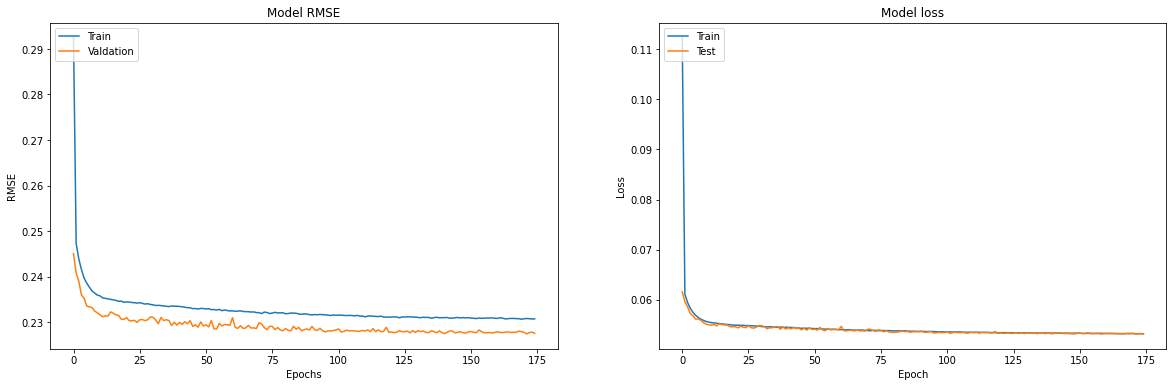

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valdation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

### Using GRU Embedding

In [ ]:
tr_lstm.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'width',
       'height', 'average_red', 'average_green', 'average_blue', 'image_size',
       'img_blur', 'day', 'dayofweek_name', 'is_weekend', 'weekday',
       'description_len', 'title_len', 'param_combined', 'param_combined_len',
       'description_char', 'title_char', 'param_char', 'punctuation_count',
       'region_enc', 'city_enc', 'pcn_enc', 'cn_enc', 'ut_enc', 'p1_enc',
       'p2_enc', 'p3_enc'],
      dtype='object')

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
ytr=tr_gru['deal_probability'].astype(np.float32)

In [36]:
ytr=tr_lstm['deal_probability'].astype(np.float32)

In [37]:
### Vocabulary size
voc_size=25000

In [ ]:
# For GRU
from sklearn.model_selection import train_test_split
xtr, xcv, ytr, ycv = train_test_split(tr_gru, ytr, test_size=0.03, random_state=42)

In [38]:
del tr_gru

In [39]:
# For LSTM
from sklearn.model_selection import train_test_split
xtr, xcv, ytr, ycv = train_test_split(tr_lstm, ytr, test_size=0.03, random_state=42)

In [40]:
del tr_lstm

In [41]:
del tr_df
del te_df
del tr
del tr_img_feat

In [ ]:
train_title=xtr['title'].copy()
val_title=xcv['title'].copy()
train_des=xtr['description'].copy()
val_des=xcv['description'].copy()

In [ ]:
cols_to_drop = ['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'activation_date',
       'user_type', 'image','dayofweek_name','param_combined']
xtr.drop(cols_to_drop + ["deal_probability"], axis=1, inplace=True)
xcv.drop(cols_to_drop + ["deal_probability"], axis=1, inplace=True)

In [ ]:
train_title

1049547                               ГАЗ 3110 Волга, 2002
1318810                               Новая ночная сорочка
467546         Учебник за 3 класс по литературе в 2 частях
839653                                     Видеонаблюдение
71357                              Тренч Ostin новый 42-44
                                ...                       
259178                            Бригада выполняет работы
1414414                       2-к квартира, 46 м², 2/5 эт.
131932                                         Аренда авто
671155     Коляска Jedo Bartatina Alu Plus Special Edition
121958                            Теплый боди для прогулок
Name: title, Length: 1353081, dtype: object

In [ ]:
train_des.reset_index

<bound method Series.reset_index of 1049547    Срочно. Продаю личный автомобиль (не перекуп)....
1318810                                                  nil
467546     Продам литературу в 2 частях , в отличном сост...
839653     Цифровое а так же аналоговое видеонаблюдение, ...
71357      Абсолютно новый тренчкот - плащ глубокого сине...
                                 ...                        
259178     Выполняем прокладку наружного трубопровода,мон...
1414414    Сдается уютная 2-комнатная квартира в Пролетар...
131932     Автомобили для вашей  свадьбы и торжественных ...
671155     Продам коляску 2 в 1 в отличном состоянии посл...
121958                                                   nil
Name: description, Length: 1353081, dtype: object>

In [ ]:
!pip install simplemma==0.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63.7 MB 148 kB/s 


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
nltk.download('stopwords')
### Dataset Preprocessing
from simplemma import text_lemmatizer
import simplemma
langdata = simplemma.load_data('ru')
corpus = []
for i in tqdm(range(0, len(train_title))):
    review=re.sub(r'[^\w\s]'," ",train_title.values[i])
    review=re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    review = re.sub(r"http\S+", " ", review)
    review = BeautifulSoup(review, 'lxml').get_text()
    review = re.sub('_',' ',review)
    review = ' '.join(text_lemmatizer(review, langdata))
    review = ' '.join([word for word in review.split() if not word in stopwords.words('russian')])
    review = ' '.join([word for word in review.split() if not word in (punctuation)])
    review = review.lower()
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
100%|██████████| 1458321/1458321 [17:54<00:00, 1357.59it/s]


In [ ]:
corpus

['продать б телевизор запчасть',
 'генрих гейне джон голсуорси собрание сочинение',
 'пальто демисез 6 лета',
 'гараж м²',
 'жилет род кожанный мех енот',
 'кухня новый наличие мамба 8',
 'монтаж система отопление водоснабжение',
 'asus transformer pad infinity tf700t 32gb',
 'обувь весенний размер',
 'куртка демисезонный пуховик',
 'костюм весна',
 'lg flatron l1953bf',
 'кроссовка адидас оригинал',
 'велотренажер kettler cycle m',
 'ваза',
 'парник теплица',
 'кресло кровать',
 'бандаж',
 'морзе д макарон hurakan hkn re150',
 'костюм весна',
 'стол лавка',
 'весь вид отделочный работа',
 'коттедж м² участок соты',
 'туфля лодочка новое',
 'шапка форменный',
 'джинса флисе',
 'mercedes benz viano',
 'размещение видео реклама автобус',
 'куртка nike',
 'куртка демисезонный',
 'маз зубренок двигатель дойц',
 'peg perego si',
 'комбинезон',
 'пальто dekka xs',
 'квартира м² 2 эт',
 'полукомбинезон baby go размер',
 'стол стул кафе',
 'юбочка ручной вязкий',
 'шуба',
 'продать платье туни

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in tqdm(corpus)] 
onehot_repr

100%|██████████| 1458321/1458321 [00:17<00:00, 82715.04it/s]


[[16558, 20507, 2320, 16329],
 [13332, 947, 22867, 5206, 10532, 16981],
 [21464, 9422, 15703, 18504],
 [18115, 11582],
 [995, 15631, 616, 5650, 188],
 [12954, 3224, 22245, 8684, 15651],
 [10812, 23085, 18781, 16045],
 [9747, 19822, 467, 3507, 24028, 19110],
 [9302, 4209, 14981],
 [2387, 11385, 2718],
 [1301, 6466],
 [10277, 18741, 24840],
 [5612, 14512, 10776],
 [17099, 8827, 10018, 2100],
 [18852],
 [8603, 12902],
 [24921, 21230],
 [3247],
 [8080, 10538, 9434, 18669, 10948, 137],
 [1301, 6466],
 [5608, 12456],
 [12537, 18948, 18690, 18608],
 [6739, 11582, 6110, 19612],
 [11155, 4268, 8520],
 [17299, 3346],
 [11361, 9214],
 [10710, 11820, 18682],
 [19959, 16267, 14135, 21127],
 [2387, 21213],
 [2387, 11385],
 [10692, 12069, 215, 14671],
 [8139, 5858, 2579],
 [21660],
 [21464, 21478, 12483],
 [20495, 11582, 20127, 10493],
 [21616, 9422, 5320, 14981],
 [5608, 23057, 15550],
 [1413, 10037, 17701],
 [12992],
 [16558, 22199, 8898],
 [23255, 13289, 15840, 21915, 995],
 [20395, 17474, 19459, 

In [ ]:
sent_length=7
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[16558 20507  2320 ...     0     0     0]
 [13332   947 22867 ... 10532 16981     0]
 [21464  9422 15703 ...     0     0     0]
 ...
 [23633 13095     0 ...     0     0     0]
 [11761 10759  2334 ...  7480 10020  7728]
 [15218 14144 19070 ...     0     0     0]]


In [ ]:
np.save("train_title.npy",embedded_docs)

In [ ]:
train_title_padded=np.load("train_title.npy")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/train_title.npy /content/drive/MyDrive/

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
nltk.download('stopwords')
### Dataset Preprocessing
sn=SnowballStemmer('russian')
corpus = []
for i in tqdm(range(0, len(val_title))):
    review=re.sub(r'[^\w\s]'," ",val_title.values[i])
    review=re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    review = re.sub(r"http\S+", " ", review)
    review = BeautifulSoup(review, 'lxml').get_text()
    review = re.sub('_',' ',review)
    review = ' '.join(text_lemmatizer(review, langdata))
    review = ' '.join([word for word in review.split() if not word in stopwords.words('russian')])
    review = ' '.join([word for word in review.split() if not word in (punctuation)])
    review = review.lower()
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 45103/45103 [00:32<00:00, 1400.38it/s]


In [ ]:
corpus

['сумка бренд louis vuitton',
 'автокресло carmate ailebebe swing moon beige',
 'пиджак кожанный',
 'сапог слякоть котофей новый',
 'юбка',
 'новый платье',
 'телефон телефон lg x210 тм1000001388',
 'salomon ekb',
 'квартира м² 5 эт',
 'свадебный шуба',
 'холодильник stinol rf nf 305a',
 'блеск губа kylie nyx selamy mac lime crime dos',
 'коляска трость teddybear sl106newс положение лежа',
 'hugo boss the scent ml',
 'уголок металлический',
 'рюкзак девочка',
 'компьютер',
 'смартфон nokia карлик',
 'футболка длинный рукав',
 'sony playstation super slim 500гб',
 'одежда',
 'предметный фотография',
 'дом стульчик',
 'слуховой морзе cyber sonic доставка россия',
 'дневной днк зародыш пшеница иван чаять пих',
 'газ волга',
 'новый комбенизон',
 'кожаный куртка',
 'майка летний нарядный',
 'стиральный машина zanussi',
 'костюм зимний ленне рост',
 'книга',
 'червяк',
 'клёш р 44',
 'платье зара',
 'гиря царский клеймо',
 'blueray player',
 'оборудование тренажерного зал',
 'новое трусик с

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in tqdm(corpus)] 
onehot_repr

100%|██████████| 45103/45103 [00:00<00:00, 90088.00it/s]


[[18618, 4688, 10476, 3310],
 [22815, 3825, 16663, 3662, 6771, 3356],
 [16400, 616],
 [1980, 13572, 12319, 3224],
 [2505],
 [3224, 22199],
 [16578, 16578, 10277, 3870, 2435],
 [18408, 4841],
 [20495, 11582, 7256, 10493],
 [9618, 12992],
 [5634, 20483, 17099, 23711, 6927],
 [6522, 22739, 19375, 20036, 1650, 20298, 17911, 22277, 23295],
 [11761, 8880, 15897, 12988, 815, 17219],
 [1293, 3034, 7903, 8873, 24752],
 [3341, 6123],
 [4028, 1997],
 [9661],
 [10105, 12536, 8185],
 [14996, 8420, 4701],
 [10792, 22724, 21940, 18181, 3908],
 [11521],
 [5704, 12189],
 [14220, 6507],
 [19514, 8080, 17808, 24639, 1165, 20648],
 [15995, 10877, 6785, 17962, 24929, 6105, 13551],
 [20177, 5078],
 [3224, 20305],
 [19046, 2387],
 [10837, 18360, 18398],
 [11394, 9507, 14419],
 [1301, 12705, 10262, 20831],
 [20305],
 [24298],
 [4213, 18150, 9381],
 [22199, 24494],
 [11438, 10964, 14346],
 [2259, 787],
 [14237, 7877, 2104],
 [8520, 8490, 5283, 5392, 14212],
 [18296, 3244],
 [1735],
 [17798, 4836],
 [3224, 1829

In [ ]:
sent_length=7
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[18618  4688 10476 ...     0     0     0]
 [22815  3825 16663 ...  6771  3356     0]
 [16400   616     0 ...     0     0     0]
 ...
 [24803 14720     0 ...     0     0     0]
 [ 1737 12511 22845 ...     0     0     0]
 [17970 10037 18608 ...     0     0     0]]


In [ ]:
np.save("val_title.npy",embedded_docs)

In [ ]:
!cp /content/val_title.npy /content/drive/MyDrive/

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
nltk.download('stopwords')
### Dataset Preprocessing
sn=SnowballStemmer('russian')
corpus = []
for i in tqdm(range(0, len(train_des))):
    review=re.sub(r'[^\w\s]'," ",train_des.values[i])
    review=re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    review = re.sub(r"http\S+", " ", review)
    review = BeautifulSoup(review, 'lxml').get_text()
    review = re.sub('_',' ',review)
    review = ' '.join(text_lemmatizer(review, langdata))
    review = ' '.join([word for word in review.split() if not word in stopwords.words('russian')])
    review = ' '.join([word for word in review.split() if not word in (punctuation)])
    review = review.lower()
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 1458321/1458321 [1:15:11<00:00, 323.24it/s]


In [ ]:
corpus

['продать б телевизор матрица неисправный материнский плат рабочий гот проверка торг уместный информация телевизор фото',
 'генрих гейне москва художественный литература 1980г 600р джон голсуорси москва художественный литература 1984г 800р хороший состояние',
 'яркий удобный носить мороз небольшой весна ранний манжета капюшон см вполне носить великий цвет первое фото',
 'охрана погреб подарок',
 'nil',
 'представлять благородию внимание кухонный гарнитура фотопечать мамба розничный продажа с оптовый склад готовый мебель весь мебель россии ещё большой мебель вы мочь увидеть конец текст объявление гарантия месяц наличие по лучший цена регион х а р а к т е р и с т и к и габарит ширина 8 м нижний часть глубина 601 мм мм верхний часть глубина мм мм нижний шкаф укомплектованный столешница кроме шкаф мойка заказать доп оплата стоимость кухня входить мойка посудосушитель дополнительный приобрести стол шлифовальной 850х850 мм навесной шкаф 850х850 мм комплект верх атаки низ атаки 650 руб стол к

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in tqdm(corpus)] 
onehot_repr

100%|██████████| 1458321/1458321 [00:51<00:00, 28565.38it/s]


[[16558,
  20507,
  2320,
  18278,
  1666,
  19692,
  7424,
  1875,
  24386,
  16951,
  10370,
  12978,
  6018,
  2320,
  6866],
 [13332,
  947,
  5292,
  8339,
  1138,
  8574,
  5639,
  22867,
  5206,
  5292,
  8339,
  1138,
  4864,
  3446,
  1209,
  16995],
 [11884,
  771,
  18057,
  14497,
  14480,
  6466,
  19287,
  1697,
  15745,
  8964,
  14033,
  18057,
  11310,
  16883,
  6824,
  6866],
 [24672, 11198, 20608],
 [13965],
 [24283,
  14812,
  8041,
  24803,
  14720,
  23862,
  8684,
  4883,
  21843,
  16838,
  5024,
  9151,
  20755,
  5113,
  12537,
  5113,
  12897,
  9634,
  2680,
  5113,
  22989,
  13137,
  19923,
  15665,
  13974,
  10984,
  2028,
  15385,
  22245,
  8419,
  16379,
  22893,
  4329,
  9686,
  2232,
  18150,
  2232,
  19370,
  9593,
  16174,
  18150,
  24003,
  16838,
  9593,
  24003,
  19370,
  24003,
  162,
  522,
  15651,
  10201,
  9589,
  16607,
  1036,
  15913,
  1770,
  1770,
  15567,
  16607,
  1036,
  1770,
  1770,
  9589,
  2955,
  14169,
  14875,
  186

In [ ]:
sent_length=250
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[16558 20507  2320 ...     0     0     0]
 [13332   947  5292 ...     0     0     0]
 [11884   771 18057 ...     0     0     0]
 ...
 [ 6371  7767  6485 ...     0     0     0]
 [16558 11761 12290 ...     0     0     0]
 [13965     0     0 ...     0     0     0]]


In [ ]:
np.save("train_des.npy",embedded_docs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -f /content/train_des.npy /content/drive/MyDrive/

In [ ]:
train_des_padded=np.load("train_des.npy")

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
nltk.download('stopwords')
### Dataset Preprocessing
sn=SnowballStemmer('russian')
corpus = []
for i in tqdm(range(0, len(val_des))):
    review=re.sub(r'[^\w\s]'," ",val_des.values[i])
    review=re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    review = re.sub(r"http\S+", " ", review)
    review = BeautifulSoup(review, 'lxml').get_text()
    review = re.sub('_',' ',review)
    review = ' '.join(text_lemmatizer(review, langdata))
    review = ' '.join([word for word in review.split() if not word in stopwords.words('russian')])
    review = ' '.join([word for word in review.split() if not word in (punctuation)])
    review = review.lower()
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 45103/45103 [02:21<00:00, 319.52it/s]


In [ ]:
corpus

['сумка коллекционный хороший состояние натуральный кожа модный стильный подарок',
 'посмотреть примерить купить автокресло нашем специализированный магазин ярославль 00 00 выходные если кресло бздеть наличие оперативный привезем заказ адрес режим работа супермаркет детский автокресел ярославль уточнять пожалуйста телефон который указанный контакт нашем сайт нашем сайт также вы мочь увидеть весить ассортимент специалист детский безопасность ответить телефон весь благородия вопрос помочь вам сделать правильный выбор покупка автокресла посол покупка установить кресло ваш автомобиль официальный гарантия производитель весь продукция лета цвет ассортимент крови 2 возраст мес лета нетто ребенка кг страна производитель япония способ установка штатный трехточечный ремень анатомический подушка да тип внутренний ремень пятиточечные регулировка высота внутренний ремень да положение авогадро положение наклон спинка да положение гарантия год нетто изделие кг габарит г ш 55х71х50 см детский автокрес

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in tqdm(corpus)] 
onehot_repr

100%|██████████| 45103/45103 [00:01<00:00, 30034.73it/s]


[[18618, 21427, 1209, 16995, 19499, 12946, 21129, 8665, 20608],
 [4968,
  11883,
  15066,
  22815,
  17423,
  5309,
  11987,
  15949,
  11250,
  11250,
  1876,
  12840,
  24921,
  18736,
  22245,
  10927,
  20559,
  16231,
  21003,
  8764,
  18608,
  4424,
  20268,
  13729,
  15949,
  11167,
  18372,
  16578,
  4873,
  20287,
  2737,
  17423,
  12898,
  17423,
  12898,
  5317,
  22989,
  13137,
  19923,
  16243,
  768,
  9177,
  20268,
  4147,
  19129,
  16578,
  12537,
  3716,
  12267,
  18645,
  22459,
  7008,
  4288,
  13718,
  3549,
  17021,
  18208,
  3549,
  13432,
  24921,
  9029,
  6371,
  20812,
  2028,
  16613,
  12537,
  19653,
  18504,
  16883,
  768,
  356,
  20127,
  16146,
  1502,
  18504,
  9417,
  17041,
  1138,
  5008,
  16613,
  4740,
  17584,
  14826,
  10245,
  17793,
  21143,
  15616,
  13465,
  3241,
  4249,
  13899,
  21143,
  490,
  7487,
  21179,
  13899,
  21143,
  3241,
  815,
  2051,
  815,
  4818,
  20794,
  3241,
  815,
  2028,
  22453,
  9417,
  24500,
 

In [ ]:
sent_length=250
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[18618 21427  1209 ...     0     0     0]
 [ 4968 11883 15066 ...     0     0     0]
 [16995 10370     0 ...     0     0     0]
 ...
 [14435 20263  5732 ...     0     0     0]
 [10370  6484  1737 ...     0     0     0]
 [13159 17970 10037 ...     0     0     0]]


In [ ]:
np.save("val_des.npy",embedded_docs)

In [ ]:
!cp /content/val_des.npy /content/drive/MyDrive/

In [ ]:
val_des_padded=np.load("val_des.npy")

In [42]:
!gdown --id 1rXR5CAy5OJuTmou0JpH2eUalZAfZtvu9
!gdown --id 1-FAUknPOypiGfKt-AUZffEKWj-st2iLF
!gdown --id 1-Gev14QVNC_9g4l1P2HTC3JK7fJfwMR5
!gdown --id 1-HPO9iNX3l5ONQUM42OAFr56_6KXn8lS

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rXR5CAy5OJuTmou0JpH2eUalZAfZtvu9
To: /content/train_title.npy
100% 40.8M/40.8M [00:00<00:00, 211MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-FAUknPOypiGfKt-AUZffEKWj-st2iLF
To: /content/val_title.npy
100% 1.26M/1.26M [00:00<00:00, 165MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From

In [43]:
tr_tit_pad=np.load('train_title.npy')
val_tit_pad=np.load('val_title.npy')
tr_des_pad=np.load('train_des.npy')
val_des_pad=np.load('val_des.npy')

In [44]:
cat_feat=['day', 'is_weekend', 'weekday','image_top_1','item_seq_number','region_enc', 'city_enc', 'pcn_enc', 'cn_enc',
       'ut_enc', 'p1_enc', 'p2_enc', 'p3_enc']


num_feat=['price','description_len', 'title_len',
       'param_combined_len', 'description_char', 'title_char', 'param_char',
       'punctuation_count','average_red', 'average_green', 'average_blue','img_blur']


In [45]:
from sklearn.preprocessing import MinMaxScaler
for col in num_feat:
    scaler = MinMaxScaler()
    xtr[col] = scaler.fit_transform(xtr[col].values.reshape(-1,1))
    xcv[col] = scaler.transform(xcv[col].values.reshape(-1,1))

In [46]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [47]:
from tensorflow import keras
from tensorflow.keras import backend as kb
from tensorflow.keras import layers, Input, callbacks, losses,optimizers
from keras.layers import LSTM, CuDNNGRU, CuDNNLSTM, GRU
from datetime import datetime

inp_desc = Input(shape=(250, ), name='inp_desc')
emb_desc = Embedding(25000,300, trainable= False)(inp_desc)
gru1=GRU(32)(emb_desc)
Drop1=layers.Dropout(0.4)(gru1)
flatten1=layers.Flatten()(Drop1)

inp_title = Input(shape=(7, ), name='inp_title')
emb_title = Embedding(25000,300, trainable= False)(inp_title)
gru2=layers.GRU(16)(emb_desc)
Drop2=layers.Dropout(0.2)(gru2)
flatten2=layers.Flatten()(Drop2)

I1= Input(shape=(len(cat_feat),),name='I1')

I2= Input(shape=(len(num_feat),),name='I2')
    
concat1=layers.concatenate([I1,I2,flatten1,flatten2])

BN=layers.BatchNormalization()(concat1)

D=layers.Dense(128,activation='relu',kernel_initializer='he_uniform')(BN)

D=layers.Dropout(0.4)(D)
    
D=layers.Dense(64,activation='relu',kernel_initializer='he_uniform')(D)

pred=layers.Dense(1,activation='linear')(D)

model=keras.Model(inputs=[I1,I2, inp_desc, inp_title],outputs=pred)
    
def rmse(y_true,y_pred):
  return kb.sqrt(kb.mean(kb.square(y_pred-y_true)))

model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
               loss='mse',
               metrics=rmse)



In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp_desc (InputLayer)          [(None, 250)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 250, 300)     7500000     ['inp_desc[0][0]']               
                                                                                                  
 gru (GRU)                      (None, 32)           32064       ['embedding[0][0]']              
                                                                                                  
 gru_1 (GRU)                    (None, 16)           15264       ['embedding[0][0]']              
                                                                                              

In [49]:


# ModelCheckpoint callback - save best weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='GRU_with_Images_best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,
                           patience=40, 
                           restore_best_weights=True,
                           mode='min')
#reduce Learning Rate
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', min_lr=0.0000001,patience=5, factor=0.9)

#terminate on NaN
terminate = tf.keras.callbacks.TerminateOnNaN()

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [ ]:
model.fit([xtr[cat_feat],
            xtr[num_feat],
             tr_des_pad,
             tr_tit_pad],
           ytr,
            batch_size=4096,
           epochs=200,
          callbacks=[checkpoint, early_stop, tensorboard, reduceLR, terminate],
          validation_data=([[xcv[cat_feat],
            xcv[num_feat],
             val_des_pad,
             val_tit_pad]],ycv))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


357/357 [==============================] - ETA: 0s - loss: 0.1097 - rmse: 0.2884

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "



Epoch 1: val_loss improved from inf to 0.06063, saving model to GRU_with_Images_best.hdf5
357/357 [==============================] - 99s 276ms/step - loss: 0.1097 - rmse: 0.2884 - val_loss: 0.0606 - val_rmse: 0.2455 - lr: 0.0100
Epoch 2/200
357/357 [==============================] - ETA: 0s - loss: 0.0612 - rmse: 0.2473
Epoch 2: val_loss improved from 0.06063 to 0.05870, saving model to GRU_with_Images_best.hdf5
357/357 [==============================] - 101s 282ms/step - loss: 0.0612 - rmse: 0.2473 - val_loss: 0.0587 - val_rmse: 0.2413 - lr: 0.0100
Epoch 3/200
357/357 [==============================] - ETA: 0s - loss: 0.0597 - rmse: 0.2443
Epoch 3: val_loss improved from 0.05870 to 0.05787, saving model to GRU_with_Images_best.hdf5
357/357 [==============================] - 102s 286ms/step - loss: 0.0597 - rmse: 0.2443 - val_loss: 0.0579 - val_rmse: 0.2391 - lr: 0.0100
Epoch 4/200
357/357 [==============================] - ETA: 0s - loss: 0.0588 - rmse: 0.2426
Epoch 4: val_loss impro

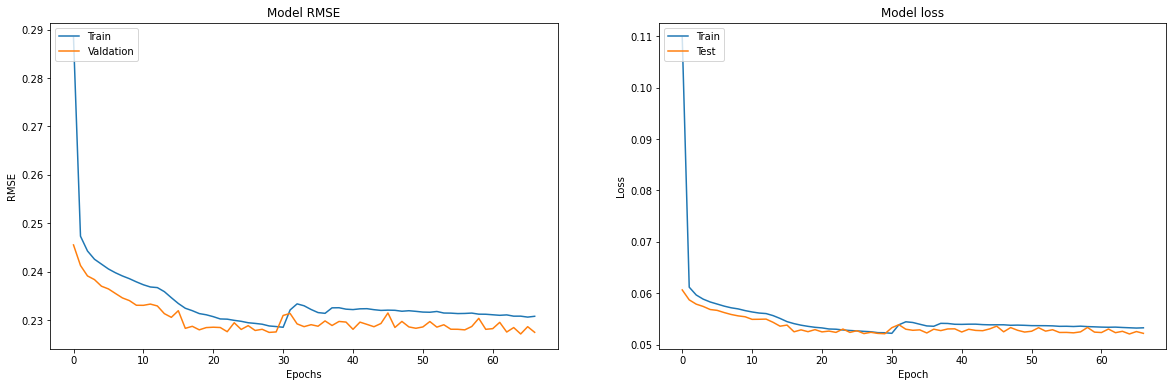

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(model.history.history['rmse'])
plt.plot(model.history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valdation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Using LSTM Now

In [51]:
from tensorflow import keras
from tensorflow.keras import backend as kb
from tensorflow.keras import layers, Input, callbacks, losses,optimizers
from keras.layers import LSTM, CuDNNGRU, CuDNNLSTM, GRU
from datetime import datetime

inp_desc = Input(shape=(250, ), name='inp_desc')
emb_desc = Embedding(25000,300, trainable= False)(inp_desc)
lstm1=LSTM(32)(emb_desc)
Drop1=layers.Dropout(0.4)(lstm1)
flatten1=layers.Flatten()(Drop1)

inp_title = Input(shape=(7, ), name='inp_title')
emb_title = Embedding(25000,300, trainable= False)(inp_title)
lstm2=LSTM(16)(emb_desc)
Drop2=layers.Dropout(0.2)(lstm2)
flatten2=layers.Flatten()(Drop2)

I1= Input(shape=(len(cat_feat),),name='I1')

I2= Input(shape=(len(num_feat),),name='I2')
    
concat1=layers.concatenate([I1,I2,flatten1,flatten2])

BN=layers.BatchNormalization()(concat1)

D=layers.Dense(128,activation='relu',kernel_initializer='he_uniform')(BN)

D=layers.Dropout(0.4)(D)
    
D=layers.Dense(64,activation='relu',kernel_initializer='he_uniform')(D)

pred=layers.Dense(1,activation='linear')(D)

model=keras.Model(inputs=[I1,I2, inp_desc, inp_title],outputs=pred)
    
def rmse(y_true,y_pred):
  return kb.sqrt(kb.mean(kb.square(y_pred-y_true)))

model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
               loss='mse',
               metrics=rmse)



In [52]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp_desc (InputLayer)          [(None, 250)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 250, 300)     7500000     ['inp_desc[0][0]']               
                                                                                                  
 lstm (LSTM)                    (None, 32)           42624       ['embedding_2[0][0]']            
                                                                                                  
 lstm_1 (LSTM)                  (None, 16)           20288       ['embedding_2[0][0]']            
                                                                                            

In [53]:


# ModelCheckpoint callback - save best weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_with_Images_best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,
                           patience=40, 
                           restore_best_weights=True,
                           mode='min')
#reduce Learning Rate
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', min_lr=0.0000001,patience=5, factor=0.9)

#terminate on NaN

terminate = tf.keras.callbacks.TerminateOnNaN()

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [54]:
model.fit([xtr[cat_feat],
            xtr[num_feat],
             tr_des_pad,
             tr_tit_pad],
           ytr,
            batch_size=4096,
           epochs=200,
          callbacks=[checkpoint, early_stop, tensorboard, reduceLR, terminate],
          validation_data=([[xcv[cat_feat],
            xcv[num_feat],
             val_des_pad,
             val_tit_pad]],ycv))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


357/357 [==============================] - ETA: 0s - loss: 0.1200 - rmse: 0.2919

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "



Epoch 1: val_loss improved from inf to 0.06032, saving model to LSTM_with_Images_best.hdf5
357/357 [==============================] - 107s 301ms/step - loss: 0.1200 - rmse: 0.2919 - val_loss: 0.0603 - val_rmse: 0.2445 - lr: 0.0100
Epoch 2/200
357/357 [==============================] - ETA: 0s - loss: 0.0608 - rmse: 0.2465
Epoch 2: val_loss improved from 0.06032 to 0.05811, saving model to LSTM_with_Images_best.hdf5
357/357 [==============================] - 108s 302ms/step - loss: 0.0608 - rmse: 0.2465 - val_loss: 0.0581 - val_rmse: 0.2395 - lr: 0.0100
Epoch 3/200
357/357 [==============================] - ETA: 0s - loss: 0.0592 - rmse: 0.2433
Epoch 3: val_loss improved from 0.05811 to 0.05719, saving model to LSTM_with_Images_best.hdf5
357/357 [==============================] - 108s 303ms/step - loss: 0.0592 - rmse: 0.2433 - val_loss: 0.0572 - val_rmse: 0.2375 - lr: 0.0100
Epoch 4/200
357/357 [==============================] - ETA: 0s - loss: 0.0583 - rmse: 0.2414
Epoch 4: val_loss i

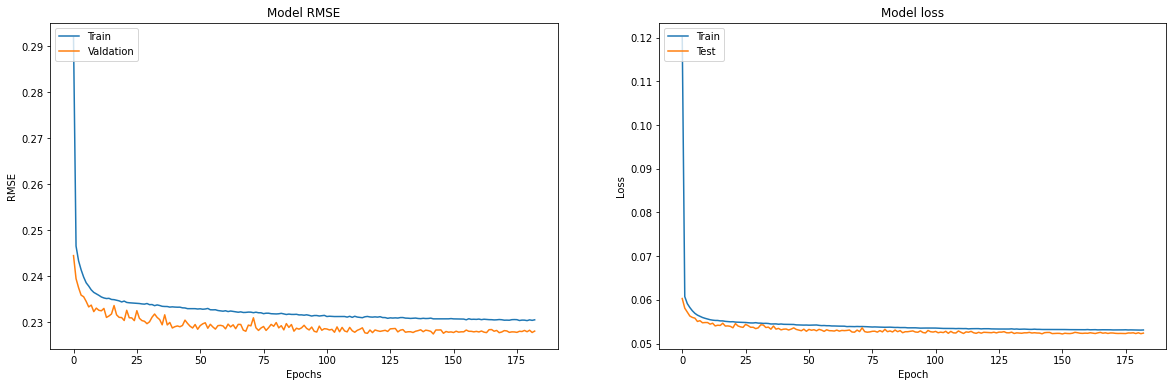

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(model.history.history['rmse'])
plt.plot(model.history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valdation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Final Summarized Results of all Model

In [1]:
from prettytable import PrettyTable
myTable = PrettyTable(["Sr No","Model Name", "Train Loss", "Validation Loss", "Train RMSE", "Validation RMSE"])
  
# Add rows
myTable.add_row(["1.", " Basic ANN with no Image Features", "0.0536", "0.535","0.2316","0.2286"])
myTable.add_row(["2.", "ANN With Extracted Image Features", "0.0533","0.532","0.2309", "0.2276"])
myTable.add_row(["3.", "ANN with GRU Embedding", "0.0523", "0.0521","0.2308","0.2271"])
myTable.add_row(["4.", "ANN With LSTM Embedding","0.0532", "0.0522", "0.2307","0.2287"])
print(myTable)

+-------+-----------------------------------+------------+-----------------+------------+-----------------+
| Sr No |             Model Name            | Train Loss | Validation Loss | Train RMSE | Validation RMSE |
+-------+-----------------------------------+------------+-----------------+------------+-----------------+
|   1.  |  Basic ANN with no Image Features |   0.0536   |      0.535      |   0.2316   |      0.2286     |
|   2.  | ANN With Extracted Image Features |   0.0533   |      0.532      |   0.2309   |      0.2276     |
|   3.  |       ANN with GRU Embedding      |   0.0523   |      0.0521     |   0.2308   |      0.2271     |
|   4.  |      ANN With LSTM Embedding      |   0.0532   |      0.0522     |   0.2307   |      0.2287     |
+-------+-----------------------------------+------------+-----------------+------------+-----------------+
